In [41]:
%matplotlib notebook
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv, ODEModel, matplotlib
import ot
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint 
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, LearnVelTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st, MiscTransforms, MeshDataset, ezshow3D
importlib.reload(ODEModel)
from ODEModel import velocMLP, FfjordModel
importlib.reload(LearnVelTraj);
from LearnVelTraj import learn_vel_trajectory
from mpl_toolkits.mplot3d import axes3d   
import pandas as pd
import plotly
import plotly.express as px
from plotly import tools
from plotly.graph_objs import * #all the types of plots that we will plot here
# plotly.offline.init_notebook_mode()

Mesh is non-watertight for contained point query!
Mesh is non-watertight for contained point query!


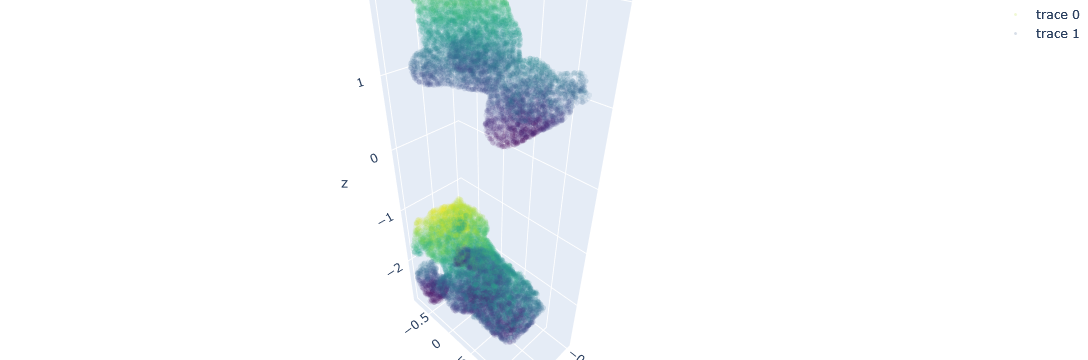

In [42]:
# Load Scene 1: cow to lion
cow = MeshDataset("scenes/cow_lion/cow.obj")
lion = MeshDataset("scenes/cow_lion/lion.obj")
inner_percentage = .7
n_total = 10000
n_inner = round(n_total*inner_percentage)
n_surface = n_total - n_inner
cow_pts = cow.sample(n_inner=n_inner, n_surface=n_surface, combined = True);
lion_pts = lion.sample(n_inner=n_inner, n_surface=n_surface, combined = True);
fig, cow_trace = ezshow3D(cow_pts, col='green', alpha=.1, size=3)
fig, lion_trace = ezshow3D(lion_pts, col='green', alpha=.1, size=3, fig=fig)
fig.show()

In [ ]:
import Utils, LearnVelTraj, ODEModel
importlib.reload(Utils); importlib.reload(ODEModel); importlib.reload(LearnVelTraj);
from ODEModel import velocMLP, FfjordModel; from LearnVelTraj import learn_vel_trajectory
keyframes, __ = ImageDataset.normalize_samples(torch.tensor(np.stack((cow_pts, lion_pts))).to(device).float())

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=4, out_features=3, incrementalMask = True).to(device)
outfolder = "results/experiment_3d_debug/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=500, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = True, lr = 2e-4)

  0%|          | 1/300 [00:00<01:31,  3.27it/s]

Allocated: 0.03 GB  Reserved: 0.66 GB
[Loss: 1.5614 | lr: 0.0002 | n_subsample: 500] 
[Total time : 0.3065 | Iter: 0.3051 | fit: 0.0872 | reg: 0.0786 | save: 0.0000) | autograd: 0.1374]



  9%|▊         | 26/300 [00:07<01:27,  3.14it/s]